# Homework - Principal Components Analysis

## Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import cm 
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


# 0. Preparation (Setting the Random State):

In [20]:
pellegrino = 331438
mungaicoppolino = 246120
rs = min(pellegrino, mungaicoppolino)
np.random.seed(rs)



# 1. Loading and Preparing the Data

### 1.1 Storing the csv file in a DataFrame Variable

The DataFrame stored in the CSV file is saved in the variable df_tot.

In [21]:
# The data of the csv file is separated by tab (\t)
df_tot = pd.read_csv("cla4lsp_customers.csv", sep='\t')
display(df_tot)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 1.2 Sub-DFs Creation

The creation of the sub-dataframe, referred to as <b>workdf</b>, involves extracting 2/3 of the rows from the original dataframe <b>df_tot</b>. This is achieved by utilizing the *frac* parameter in the pandas method *sample*.

In [22]:
workdf = df_tot.sample(frac=2/3, random_state=rs)
display(workdf)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
762,6406,1988,Master,Married,78285.0,0,0,28-10-2013,13,647,...,3,0,0,0,0,0,0,3,11,0
2206,1092,1980,Graduation,Married,61014.0,0,1,11-08-2012,17,269,...,7,0,0,0,0,0,0,3,11,0
419,8581,1971,Master,Married,49505.0,1,1,05-03-2013,4,604,...,8,0,0,0,0,0,0,3,11,0
1370,5948,1975,Graduation,Single,57338.0,0,1,29-04-2014,96,143,...,5,0,0,0,0,0,0,3,11,0
1775,8910,1955,Graduation,Together,42586.0,1,1,29-10-2012,7,194,...,8,0,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,4351,1955,Graduation,Divorced,37244.0,1,1,27-04-2013,90,18,...,7,1,0,0,0,0,0,3,11,0
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,2,0,0,0,0,0,1,3,11,0
1118,880,1966,Basic,Together,22634.0,0,0,16-01-2013,47,2,...,8,0,0,0,0,0,0,3,11,0
1520,4278,1983,PhD,Single,87188.0,0,0,03-06-2013,73,910,...,3,0,0,0,0,0,0,3,11,1


### 1.3 Labels and Features
Two lists are created for the labels and features of Appendix A. The 'ID', 'Z_CostContact', and 'Z_Revenue' columns are then discarded from workdf

In [23]:
labels = ['NumDealsPurchases',
'AcceptedCmp1',
'AcceptedCmp2',
'AcceptedCmp3',
'AcceptedCmp4',
'AcceptedCmp5',
'Response',
'Complain',
'Recency'] #len(labels) == 9

features = [
    'Year_Birth',
    'Education',
    'Marital_Status',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dt_Customer',
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts', 
    'MntGoldProds', 
    'NumWebPurchases', 
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
] #len(features) == 17 

workdf = workdf.loc[:, labels + features]


### 1.4 Feature randomly dropped
The features related to the purchases of the customer are stored in a list that is then used to pick randomly a feature to discard. 

In [24]:
purchase_features = ['MntWines', 
                    'MntFruits', 
                    'MntMeatProducts',
                    'MntFishProducts',
                    'MntSweetProducts', 
                    'MntGoldProds', 
                    'NumWebPurchases', 
                    'NumCatalogPurchases',
                    'NumStorePurchases']

# The method choice is used to pick a random item from the list purchase_features
removed_feature = np.random.choice(purchase_features) 
workdf = workdf.drop(columns=removed_feature)
features.remove(removed_feature)
print(f"Feature removed: {removed_feature}")

Feature removed: NumStorePurchases


### 1.5 Cleaning of workdf
In the following cell, the function *isna()* examines the columns looking for NaN values and subsequently prints the corresponding NaN occurrence counts.

In [25]:
tmp_df = workdf.loc[:, features]
columns_with_nan = tmp_df.columns[tmp_df.isna().any(axis=0)].to_list()

# Counting NaN values: utilizing the sum() method, the boolean values are summed up to the count.
nan_count = tmp_df[columns_with_nan].isna().sum()
for column, count in nan_count.items():
    print(f"The Column '{column}' has {count} NaN values.")

The Column 'Income' has 16 NaN values.


The dataset contains NaN values exclusively in the 'Income' column. As there are no suitable methods for imputing these null values without introducing bias, and considering the low count of missing values relative to the dataframe's dimension, it is chosen to remove the respective rows.

In [26]:
# Drop of the rows which contain NaN value in 'Income'
workdf = workdf.dropna()

# 2. Encoding of Categorical Data
The method *select_dtypes* is used to print a list contaning the names of the categorical columns of workdf


In [27]:
categorical_columns = workdf.select_dtypes(include='object').columns.to_list()

Before deciding which encoder to adopt, it is wise to assess the number of distinct values present within the categorical columns

In [28]:
for column in categorical_columns:
    print(f'The column {column} has {len(workdf[column].unique())} unique elements')

The column Education has 5 unique elements
The column Marital_Status has 8 unique elements
The column Dt_Customer has 601 unique elements


For the 'Education' and 'Marital_Status' columns, it is decided to perform the One-Hot Encoding. These two features have a relatively low count of unique elements, indicating that the encoding process will not inflate the dataset's dimensionality. Additionally, One-Hot Encoding guarantees the absence of any implicit order. While this is crucial for Marital_Status, given the lack of a natural ordering for its values, this necessity could be arguable for Education. Specifically, a rank of ascending integers could be assigned that reflects a progression from lower to higher level of education. This lack of clarity implies that the established ranking may not be accurate, potentially introducing bias into the data.

In [29]:
OHE = OneHotEncoder()
# Transforming the columns 'Education' and 'Marital_Status' using the One-Hot Encoding function
transformed = OHE.fit_transform(workdf.loc[:, ['Education', 'Marital_Status']])
# Adding these new columns in workdf
workdf[OHE.get_feature_names_out()] = transformed.toarray()
# Drop the old columns
workdf = workdf.drop(columns=['Education', 'Marital_Status'])
# updating the list of features
features = features + list(OHE.get_feature_names_out())
features = [item for item in features if item not in ['Marital_Status', 'Education']]


For 'Dt_Customer' it was decided to convert the dates in days. In this way the column is converted while preserving the cronological order of the dates and how much time is passed beetween them. While this process generates large numbers, it's not a problem due to the upcoming data scaling in *Exercise 3*

In [30]:
split_columns = workdf['Dt_Customer'].str.split('-', expand=True)
split_columns = split_columns.apply(pd.to_numeric)
workdf['Dt_Customer'] = split_columns.iloc[:, 0] + split_columns.iloc[:,1] * 30 + split_columns.iloc[:,2] * 365

The sub-DF containing only the features of workdf, updated after the encoding, is stored in the variable Xworkdf

In [31]:
Xworkdf = workdf[features]

# 3. Preprocessing and full-PCA

Creation of the two DFs *Xworkdf_std* and *Xworksf_mm*, made by the transformation of Xworkdf, using a StandardScaler and a MinMaxScaler respectively

In [32]:
STDscaler = StandardScaler()
MMscaler = MinMaxScaler()

Xworkdf_std = STDscaler.fit_transform(Xworkdf)
Xworkdf_mm = MMscaler.fit_transform(Xworkdf)

Xworkdf_std = pd.DataFrame(Xworkdf_std, columns=Xworkdf.columns)
Xworkdf_mm = pd.DataFrame(Xworkdf_mm, columns=Xworkdf.columns)

In [66]:
a = [1000000000, 1000000001]
np.var([1000000000, 1000000001])
display(np.var([0,1]))
b1 = (a[0] - 1000000000)/(1000000001-1000000000)
b2 = (a[1] - 1000000000)/(1000000001-1000000000)
np.var([b1, b2])

0.25

0.25

Plotting the variances of each feature allows us to gain insights from the dataset.
The plots displayed represent, in respective order, the variances of the unscaled dataset, the standard scaled dataset, and the min-max scaled dataset.

In [46]:
display(Xworkdf['Income'].max())
display(Xworkdf['Income'].min())
display(Xworkdf['Dt_Customer'].max())
display(Xworkdf['Dt_Customer'].min())

162397.0

1730.0

735319

734621

In [56]:
es1 = np.zeros(1000)

es1 = np.append(es1, 1)
es1.var()

0.000998002996004994

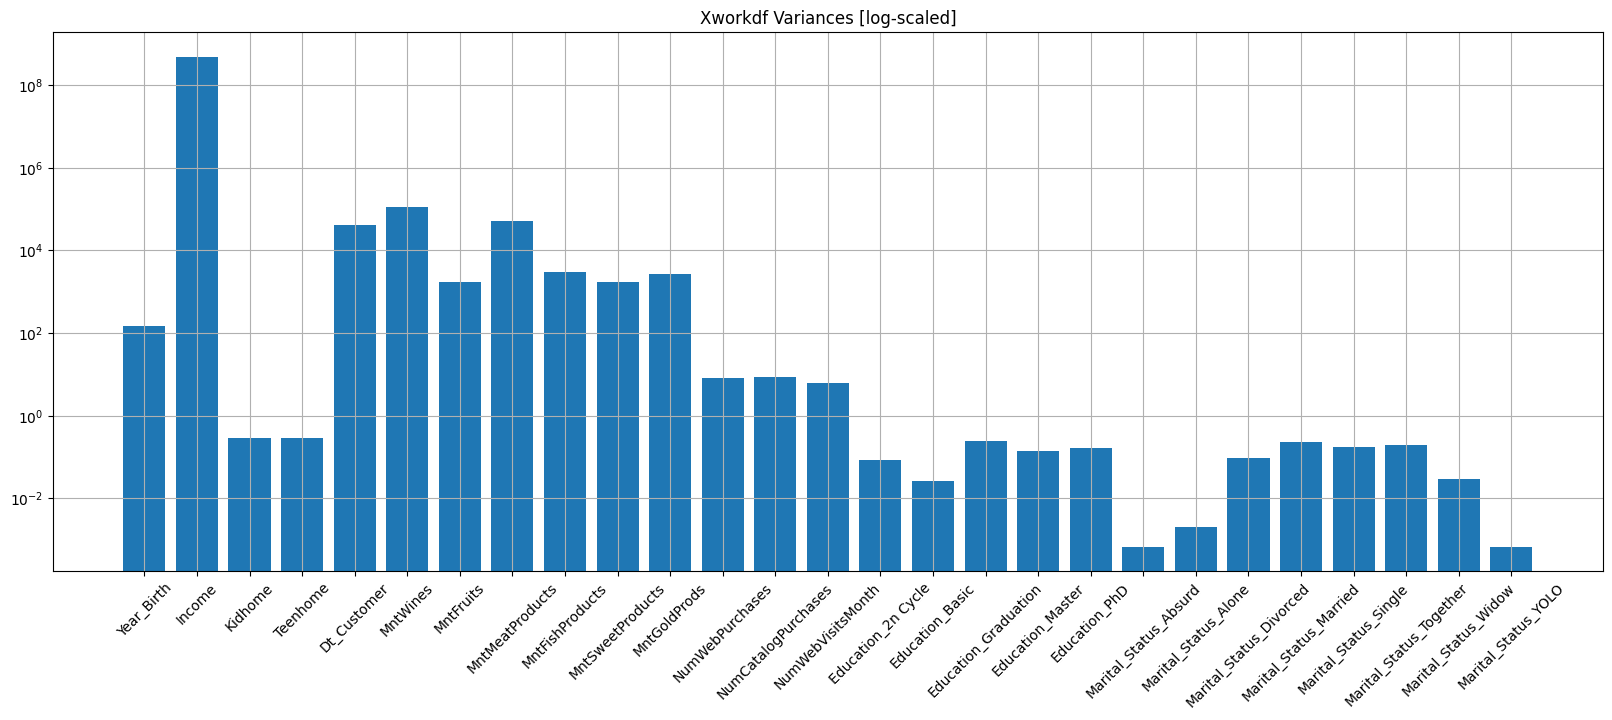

In [68]:
fig, ax = plt.subplots(figsize=(20, 7))

# Plotting the bar chart in the first subplot
ax.bar(np.arange(Xworkdf.shape[1]), np.array(Xworkdf.var()))
ax.set_xticks(ticks=np.arange(Xworkdf.shape[1]))
ax.set_xticklabels(labels=Xworkdf.columns.to_list(), rotation=45)
ax.set_title('Xworkdf Variances [log-scaled]')
ax.set_yscale('log')
ax.grid(visible=True, which='both')


In [45]:
Xworkdf.var(axis=0)

Year_Birth                 1.514082e+02
Income                     4.804552e+08
Kidhome                    2.894903e-01
Teenhome                   2.894637e-01
Dt_Customer                4.180410e+04
MntWines                   1.117026e+05
MntFruits                  1.663875e+03
MntMeatProducts            5.047666e+04
MntFishProducts            2.948682e+03
MntSweetProducts           1.703929e+03
MntGoldProds               2.694710e+03
NumWebPurchases            7.948483e+00
NumCatalogPurchases        8.769338e+00
NumWebVisitsMonth          6.049917e+00
Education_2n Cycle         8.640895e-02
Education_Basic            2.636634e-02
Education_Graduation       2.501601e-01
Education_Master           1.411553e-01
Education_PhD              1.663382e-01
Marital_Status_Absurd      6.770481e-04
Marital_Status_Alone       2.028392e-03
Marital_Status_Divorced    9.612706e-02
Marital_Status_Married     2.350586e-01
Marital_Status_Single      1.709785e-01
Marital_Status_Together    1.938174e-01


In [43]:
Xworkdf_std.var(axis=1)

0       1.024372
1       1.010971
2       0.704493
3       0.455249
4       0.509140
          ...   
1472    0.710809
1473    0.721328
1474    1.871798
1475    1.255931
1476    0.497229
Length: 1477, dtype: float64

For a better respresentation for the unscaled dataset is preferred a log plot, due to the different d

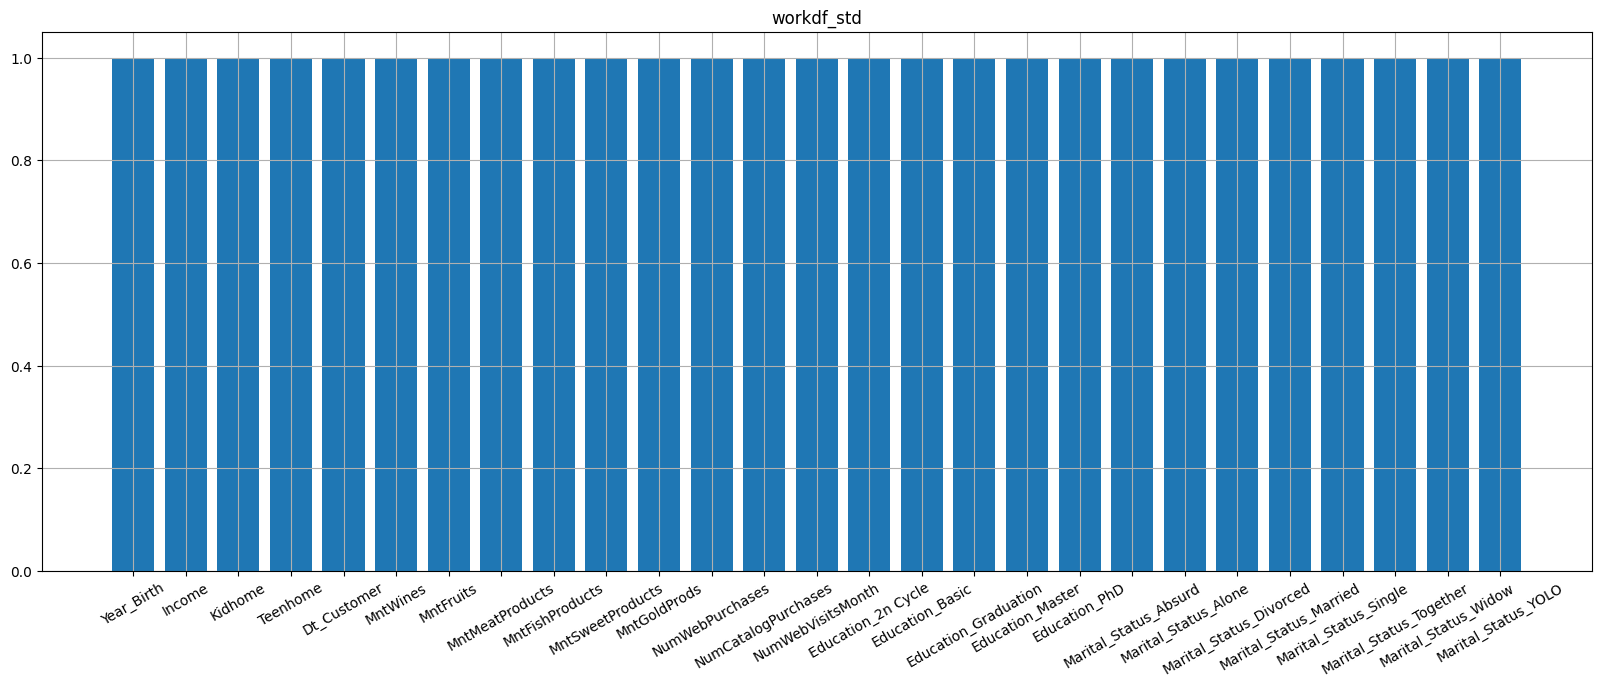

In [34]:
fig, ax = plt.subplots(figsize=(20, 7))

ax.bar(np.arange(Xworkdf.shape[1]), Xworkdf_std.var())
ax.set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=30)
ax.set_title('workdf_std')
ax.grid(visible=True, which='both')

Below are shown the plots of *Xworkdf*,

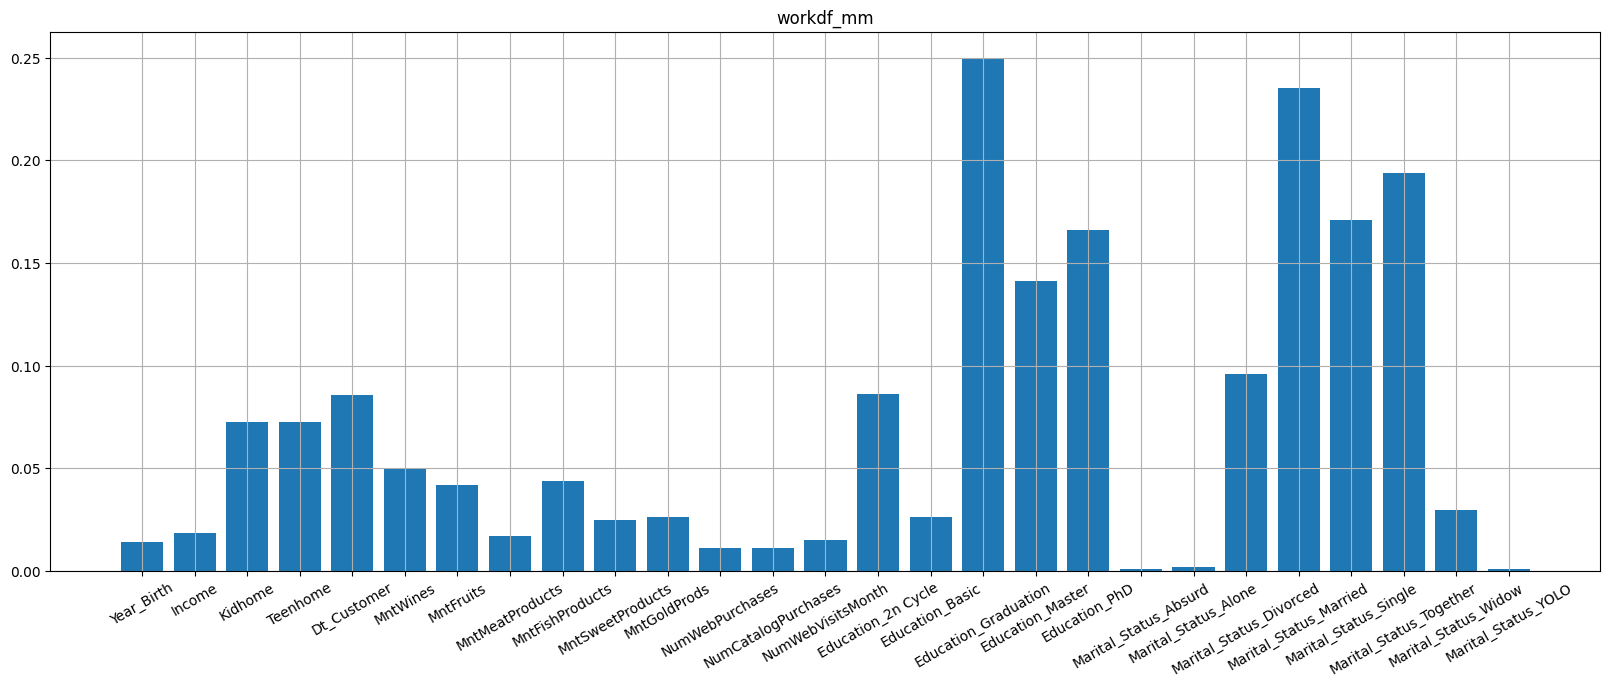

In [35]:
fig, ax = plt.subplots(figsize=(20, 7))

ax.bar(np.arange(Xworkdf.shape[1]), Xworkdf_mm.var())
ax.set_xticks(ticks=np.arange(Xworkdf.shape[1]), 
           labels=Xworkdf.columns.to_list(),
           rotation=30)
ax.set_title('workdf_mm')
ax.grid(visible=True, which='both')

PCA

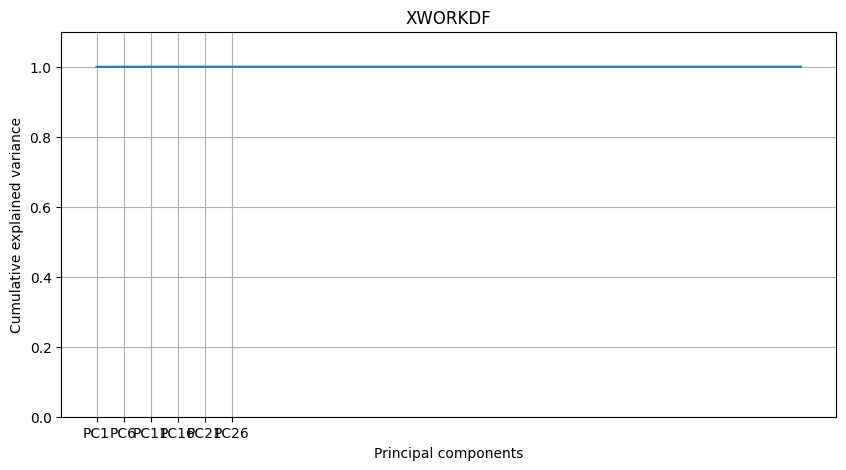

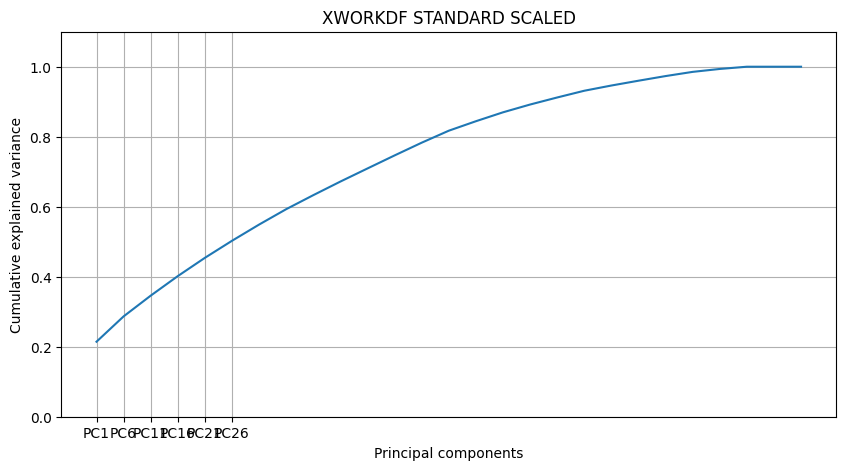

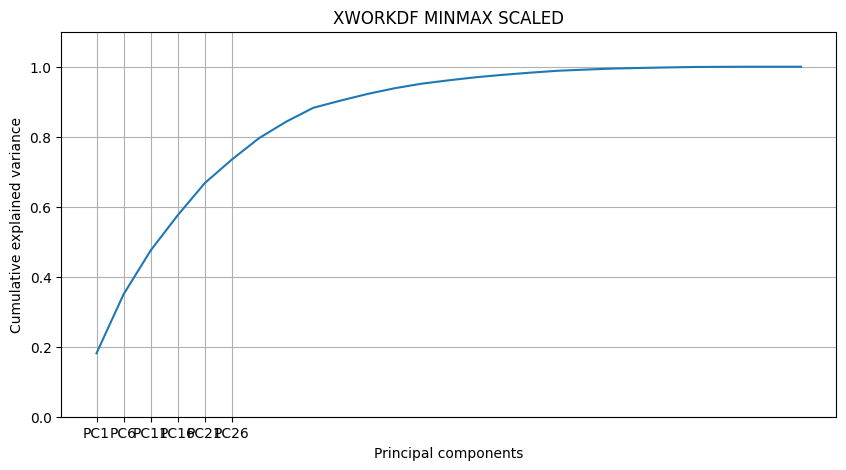

In [36]:
pca_nostd = PCA(random_state=rs)
pca_std = PCA(random_state=rs)
pca_mm = PCA(random_state=rs)

pca_nostd.fit(Xworkdf)
pca_std.fit(Xworkdf_std)
pca_mm.fit(Xworkdf_mm)

explained_variance_std = np.cumsum(pca_std.explained_variance_ratio_)
explained_variance_mm = np.cumsum(pca_mm.explained_variance_ratio_)

#pca_nostd
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_nostd.explained_variance_ratio_))
plt.title('XWORKDF')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(len([f'PC{i + 1}' for i in range(0,pca_nostd.n_features_in_,5)])), 
           labels=[f'PC{i + 1}' for i in range(0,pca_nostd.n_features_in_,5)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


#pca_std
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.title('XWORKDF STANDARD SCALED')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(len([f'PC{i + 1}' for i in range(0,pca_std.n_features_in_,5)])), 
           labels=[f'PC{i + 1}' for i in range(0,pca_std.n_features_in_,5)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

#pca_mm
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_mm.explained_variance_ratio_))
plt.title('XWORKDF MINMAX SCALED')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(len([f'PC{i + 1}' for i in range(0,pca_mm.n_features_in_,5)])), 
           labels=[f'PC{i + 1}' for i in range(0,pca_mm.n_features_in_,5)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


m' is the minimum number of PCs that explains 33% of the total variance.

In [37]:
# argmax = indice del primo elemento di un array > di un treshold
m_prime_std = np.argmax(explained_variance_std > 0.33) + 1
m_prime_mm = np.argmax(explained_variance_mm > 0.33) + 1

m_std = min(m_prime_std, 5)
m_mm = min(m_prime_mm, 5)

print(f'm_std is equal to: {m_std}')
print(f'm_mm is equal to: {m_mm}')

pca_std = PCA(n_components=m_std, random_state = rs)
pca_mm = PCA(n_components=m_mm, random_state=rs)

Y_Xworkdf_std = pca_std.fit_transform(Xworkdf_std)
Y_Xworkdf_mm = pca_mm.fit_transform(Xworkdf_mm)


m_std is equal to: 3
m_mm is equal to: 2


In [38]:
for i in range(0, 2):
    for j in range(0, 2):
        ax[i,j].plot([eps, eps], [-0.5, pca_std.n_features_in_ - 0.5], '#b51963')
        ax[i,j].plot([-eps, -eps], [-0.5, pca_std.n_features_in_ - 0.5],'#b51963')
        color_list = ['#F57600' if val >= eps else '#0073E6' if val <= -eps else '#D3D3D3' for val in pca_std.components_[num, :]]
        ax[i,j].barh(np.arange(pca_std.n_features_in_), pca_std.components_[num, :], color=color_list)
        ax[i,j].set_yticks(ticks=np.arange(pca_std.n_features_in_))
        ax[i,j].set_yticklabels(labels=Xworkdf_std.columns.to_list())
        ax[i,j].set_title('Workdf_std - PC%d' % (num+1))
        ax[i,j].grid()
        

        num += 1

plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

pca_std


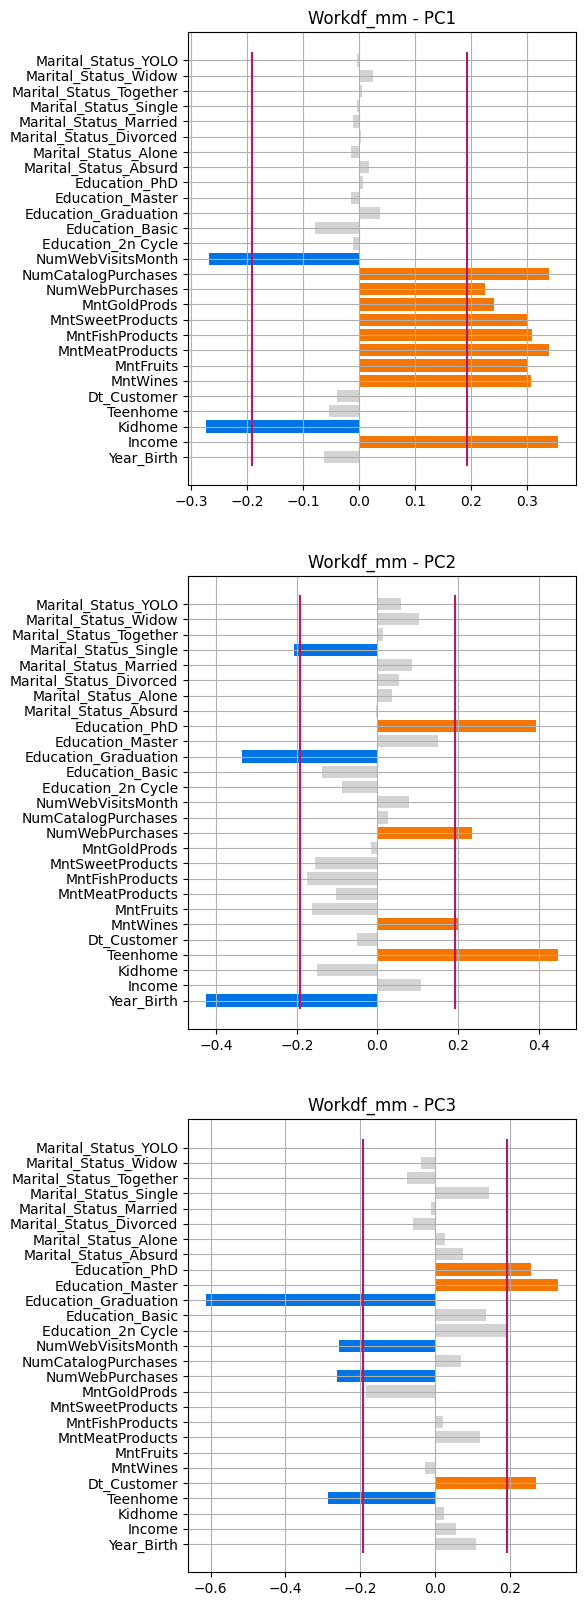

In [ ]:
eps = np.sqrt(1 / Xworkdf.shape[1])

fig, ax = plt.subplots(m_std, 1, figsize=(5, 20))
num = 0
for i in range(0, m_std):
        ax[i].plot([eps, eps], [-0.5, pca_std.n_features_in_ - 0.5], '#b51963')
        ax[i].plot([-eps, -eps], [-0.5, pca_std.n_features_in_ - 0.5],'#b51963')
        color_list = ['#F57600' if val >= eps else '#0073E6' if val <= -eps else '#D3D3D3' for val in pca_std.components_[i, :]]
        ax[i].barh(np.arange(pca_std.n_features_in_), pca_std.components_[i, :], color=color_list)
        ax[i].set_yticks(ticks=np.arange(pca_std.n_features_in_))
        ax[i].set_yticklabels(labels=Xworkdf_std.columns.to_list())
        ax[i].set_title('Workdf_mm - PC%d' % (i+1))
        ax[i].grid()



pca_mm

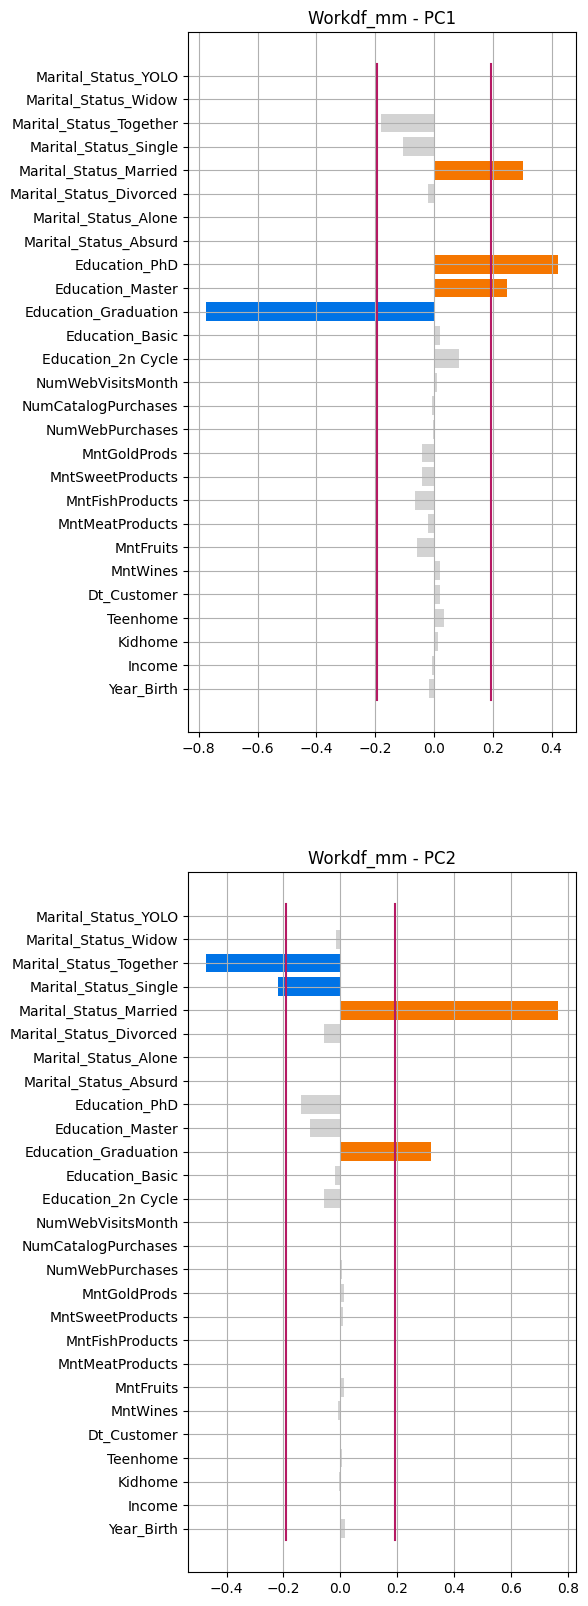

In [ ]:
eps = np.sqrt(1 / Xworkdf.shape[1])

fig, ax = plt.subplots(m_mm, 1, figsize=(5, 20))
for i in range(0, m_mm):
        ax[i].plot([eps, eps], [-0.5, pca_mm.n_features_in_ - 0.5], '#b51963')
        ax[i].plot([-eps, -eps], [-0.5, pca_mm.n_features_in_ - 0.5],'#b51963')
        color_list = ['#F57600' if val >= eps else '#0073E6' if val <= -eps else '#D3D3D3' for val in pca_mm.components_[i, :]]
        ax[i].barh(np.arange(pca_mm.n_features_in_), pca_mm.components_[i, :], color=color_list)
        ax[i].set_yticks(ticks=np.arange(pca_mm.n_features_in_))
        ax[i].set_yticklabels(labels=Xworkdf_mm.columns.to_list())
        ax[i].set_title('Workdf_mm - PC%d' % (i+1))
        ax[i].grid()

plt.show()

Spieghiamo che l abbiamo trovato 

In [ ]:
l_std = 2 if m_std == 2 else 3
l_mm = 2 if m_mm == 2 else 3

print(f'l_std is equal to: {l_std}')
print(f'l_mm is equal to: {l_mm}')

l_std is equal to: 3
l_mm is equal to: 2


Dato Che l_std = 3 non serve il nome per la PC4

Spiegare come nominiamo le PC e come abbreviamo sti nomi

MWV_MWS_MS_AV_C_E_K/T

In [ ]:
#PC1 : Customer's Income & Purchases (+) VS 
#   Montly Web Visits of a Customer with Kids (-)
stdPC1 = "C.Inc_Purc_vs\n_MwV_C.K"    

#PC2: Customer with PHD & Teens that prefer Online Shopping Of Wine (+) VS 
#   Age Verified Customer with Graduation that is Single (-) 
stdPC2 = "C.PhD_T_OnShopWine_vs\n_AvC.Grad_Single" 

#PC3: Date of the Website Sign Up of a Customer with either a Master or a PHD (+) VS
#   Monthly Web Visits of a Customer with Graduation and Kids that prefer Online Shopping(-) 
stdPC3 = "DwSu_C.Master/PhD_vs\n_MwV_C.Grad_K_OnShop" 


#PC1 : A Customer with either a Master or a PHD that is Married (+) VS A Graduated customer (-)
mmPC1 = "C.Master/PhD_Married_vs\n_C.Grad"  
#PC2: A Customer with Graduation that is Married (+) VS A customer either Single or that Live Together(-)
mmPC2 = "C.Grad_Married_vs\n_C.Single/LivTog"  


Plot - Score Graph



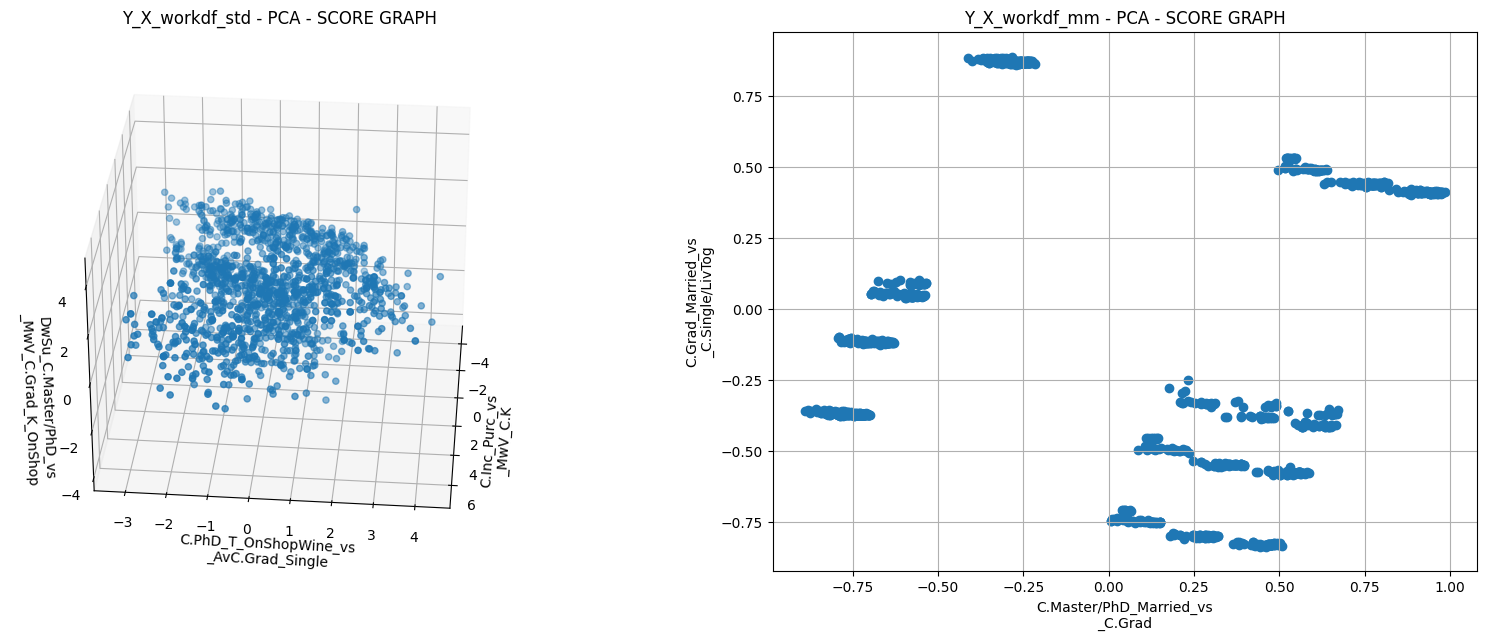

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(20,7)) 
ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2])
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
ax1.set_zlabel(f'{stdPC3}')
ax1.view_init(elev=30, azim=5)
             
ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1])
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.grid()
plt.show()
plt.tight_layout()


OPTIONAL: Confronto tra colonna response e Cmp = somma delle colonne 

In [ ]:
Cmp_column = workdf['AcceptedCmp1'] + workdf['AcceptedCmp2'] + workdf['AcceptedCmp3'] + workdf['AcceptedCmp4'] + workdf['AcceptedCmp5'] + workdf['Response']
workdf['Cmp'] = Cmp_column
Cmp = np.sort(Cmp_column.unique())
Response = workdf['Response'].unique()
Complain = workdf['Complain'].unique()
# fai un print piu carino
display(Complain)

array([0, 1], dtype=int64)

OPTIANAL: Confronto tra le varie Campagne Pubblicitarie

In [ ]:
Cmp_column_2 = 

Commenta i displays

In [ ]:
plt.close()
custom_colors_Response = ['#D3D3D3', '#F57600']

Response_colors = {Response[i]: custom_colors_Response[i] for i in range(len(Response))} 
workdf['color_Response'] = [Response_colors[t] for t in workdf['Response'].values]
Reponse_color_legend = [Line2D([0], [0], color=Response_colors[k]) for k in Response_colors.keys()]


fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])               


ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])
plt.grid()
plt.show()


custom_colors_Cmp = ['#D3D3D3', '#F57600', '#baff4f', '#3ff1c1', '#58adff', '#865dcb']
Cmp_colors = {Cmp[i]: custom_colors_Cmp[i] for i in range(len(Cmp))} 
workdf['color_Cmp'] = [Cmp_colors[t] for t in Cmp_column.values]
Cmp_color_legend = [Line2D([0], [0], color=Cmp_colors[k]) for k in Cmp_colors.keys()]


fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])


plt.grid()
plt.show()

custom_colors_Complain = ['#D3D3D3', '#F57600']
Complain_colors = {Complain[i]: custom_colors_Complain[i] for i in range(len(Complain))} 
workdf['color_Complain'] = [Complain_colors[t] for t in workdf['Complain'].values]
Complain_color_legend = [Line2D([0], [0], color=Complain_colors[k]) for k in Complain_colors.keys()]

fig = plt.figure(figsize=(15,7)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 

plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 

plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])

plt.grid()
plt.show()

NameError: name 'Response' is not defined

In [ ]:
plt.close()
custom_colors_Response = ['#D3D3D3', '#F57600']

Response_colors = {Response[i]: custom_colors_Response[i] for i in range(len(Response))} 
workdf['color_Response'] = [Response_colors[t] for t in workdf['Response'].values]
Reponse_color_legend = [Line2D([0], [0], color=Response_colors[k]) for k in Response_colors.keys()]


fig = plt.figure(figsize=(18,7)) 
ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
ax1.set_zlabel(f'{stdPC3}')
ax1.view_init(elev=30, azim=5)
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])   



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Response'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Reponse_color_legend, [k for k in Response_colors.keys()])
plt.grid()
plt.show()


custom_colors_Cmp = ['#D3D3D3', '#F57600', '#baff4f', '#3ff1c1', '#58adff', '#865dcb']
Cmp_colors = {Cmp[i]: custom_colors_Cmp[i] for i in range(len(Cmp))} 
workdf['color_Cmp'] = [Cmp_colors[t] for t in Cmp_column.values]
Cmp_color_legend = [Line2D([0], [0], color=Cmp_colors[k]) for k in Cmp_colors.keys()]


fig = plt.figure(figsize=(18,7)) 
ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
ax1.set_zlabel(f'{stdPC3}')
ax1.view_init(elev=30, azim=5)
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Cmp'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 
plt.legend(Cmp_color_legend, [k for k in Cmp_colors.keys()])


plt.grid()
plt.show()

custom_colors_Complain = ['#D3D3D3', '#F57600']
Complain_colors = {Complain[i]: custom_colors_Complain[i] for i in range(len(Complain))} 
workdf['color_Complain'] = [Complain_colors[t] for t in workdf['Complain'].values]
Complain_color_legend = [Line2D([0], [0], color=Complain_colors[k]) for k in Complain_colors.keys()]

fig = plt.figure(figsize=(18,7)) 
ax1 = fig.add_subplot(1, 2, 1, projection=f'{l_std}d')
ax1.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_std - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{stdPC1}')
ax1.set_ylabel(f'{stdPC2}') 
ax1.set_zlabel(f'{stdPC3}')
ax1.view_init(elev=30, azim=5)
plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])               



ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['color_Complain'].values, alpha = 0.4)
plt.title('Y_X_workdf_mm - PCA - SCORE GRAPH')
ax1.set_xlabel(f'{mmPC1}')
ax1.set_ylabel(f'{mmPC2}') 

plt.legend(Complain_color_legend, [k for k in Complain_colors.keys()])

plt.grid()
plt.show()

NameError: name 'Response' is not defined

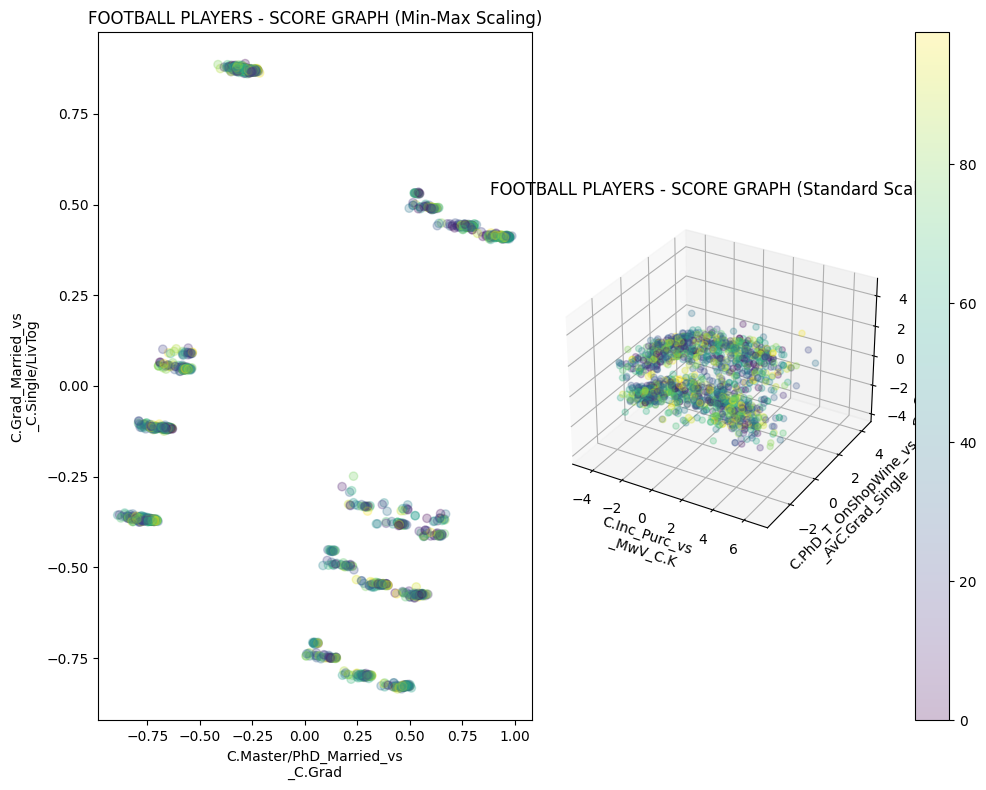

In [ ]:
# MAKE THE 3D SCORE GRAPH
fig_recency = plt.figure(figsize=(10, 8))

# First subplot
ax_recency1 = fig_recency.add_subplot(121)
scatter1 = ax_recency1.scatter(Y_Xworkdf_mm[:, 0], Y_Xworkdf_mm[:, 1], c=workdf['Recency'].values, alpha=0.25)
ax_recency1.set_title('FOOTBALL PLAYERS - SCORE GRAPH (Min-Max Scaling)')
ax_recency1.set_xlabel(f'{mmPC1}')
ax_recency1.set_ylabel(f'{mmPC2}')

# Second subplot

ax_recency2 = fig_recency.add_subplot(122, projection='3d')
scatter2 = ax_recency2.scatter(Y_Xworkdf_std[:, 0], Y_Xworkdf_std[:, 1], Y_Xworkdf_std[:, 2], c=workdf['Recency'].values, alpha=0.25)
ax_recency2.set_title('FOOTBALL PLAYERS - SCORE GRAPH (Standard Scaling)')
ax_recency2.set_xlabel(f'{stdPC1}')
ax_recency2.set_ylabel(f'{stdPC2}')
ax_recency2.set_zlabel(f'{stdPC3}')

# Adjust layout
fig_recency.tight_layout()

# Add colorbar
cbar = fig_recency.colorbar(scatter2)

# Show the plot
plt.grid()
plt.show()

## 5. k-Means

k-Means algorithm using the *silhouette coefficient*

In [ ]:
k_list = [i for i in range(3, 11)]
km_list_std = []
km_list_mm = []
silcoeff_list_std = []
silcoeff_list_mm = []

for i in range(len(k_list)):
    km_list_std.append(KMeans(n_clusters=k_list[i], n_init="auto", random_state=rs))
    km_list_mm.append(KMeans(n_clusters=k_list[i], n_init="auto", random_state=rs))
    cluster_labels_std = km_list_std[i].fit_predict(Y_Xworkdf_std[:,0:l_std])
    cluster_labels_mm = km_list_mm[i].fit_predict(Y_Xworkdf_mm)
    silhouette_avg_std = silhouette_score(Y_Xworkdf_std, cluster_labels_std)
    silhouette_avg_mm = silhouette_score(Y_Xworkdf_mm, cluster_labels_mm)
    silcoeff_list_std.append(silhouette_avg_std)
    silcoeff_list_mm.append(silhouette_avg_mm)

    print(
        "For n_clusters =",
        k_list[i],
        "\n - silhouette_score_std is:\t",
        silhouette_avg_std,
        "\n - silhouette_score_mm is:\t",
        silhouette_avg_mm
    )
    
best_k_std = k_list[np.argmax(silcoeff_list_std)]
best_k_mm = k_list[np.argmax(silcoeff_list_mm)]
km_std = km_list_std[np.argmax(silcoeff_list_std)]
km_mm = km_list_mm[np.argmax(silcoeff_list_mm)]
    
print(f'\n\nBest silhouette_score_std:\t{np.max(silcoeff_list_std):.5f} => n_cluster= {best_k_std}') 
print(f'Best silhouette_score_mm:\t{np.max(silcoeff_list_mm):.5f} => n_cluster= {best_k_mm}')   

For n_clusters = 3 
 - silhouette_score_std is:	 0.34570354637480233 
 - silhouette_score_mm is:	 0.6496596420594638
For n_clusters = 4 
 - silhouette_score_std is:	 0.3239733998518198 
 - silhouette_score_mm is:	 0.804948058973445
For n_clusters = 5 
 - silhouette_score_std is:	 0.32577792069282513 
 - silhouette_score_mm is:	 0.7833466588458111
For n_clusters = 6 
 - silhouette_score_std is:	 0.34086883770177867 
 - silhouette_score_mm is:	 0.70090658252506
For n_clusters = 7 
 - silhouette_score_std is:	 0.3336230347291751 
 - silhouette_score_mm is:	 0.7178347217389738
For n_clusters = 8 
 - silhouette_score_std is:	 0.3244855226623685 
 - silhouette_score_mm is:	 0.6959477398856098
For n_clusters = 9 
 - silhouette_score_std is:	 0.3358846735196086 
 - silhouette_score_mm is:	 0.700989585163108
For n_clusters = 10 
 - silhouette_score_std is:	 0.3285327257260854 
 - silhouette_score_mm is:	 0.7233774997296311


Best silhouette_score_std:	0.34570 => n_cluster= 3
Best silhouette_sco

In [ ]:
np.arange(km_std.cluster_centers_.shape[1])

array([0, 1, 2])

array([-2.17198673, -0.53583742,  0.15805192])

array([ 0.20272131,  1.27757716, -0.42801811])

array([ 3.33582531, -0.60392532,  0.23762639])

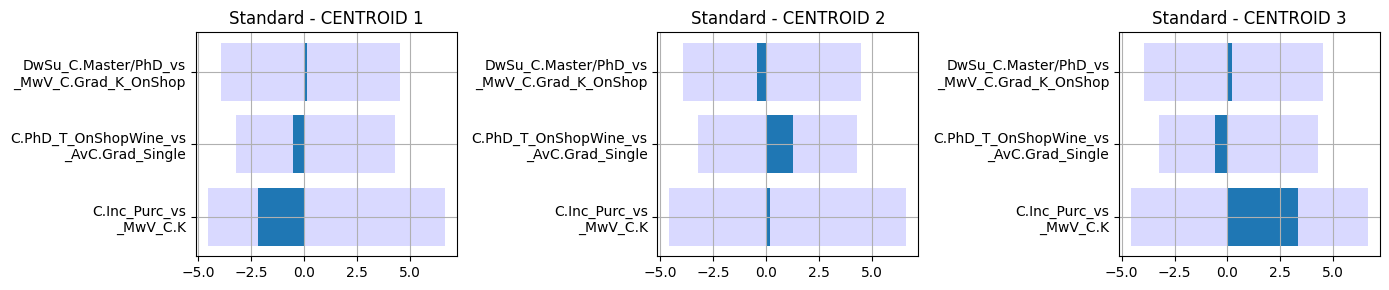

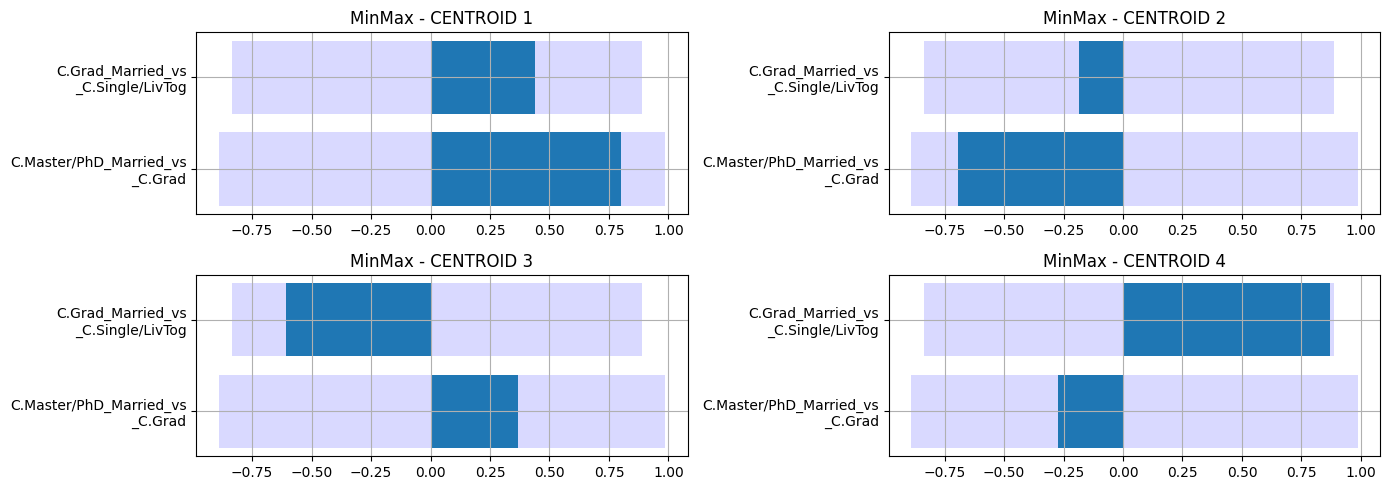

In [ ]:
maxs_std = Y_Xworkdf_std[:, 0:l_std].max(axis=0) 
mins_std = Y_Xworkdf_std[:, 0:l_std].min(axis=0) 

maxs_mm = Y_Xworkdf_mm.max(axis=0) 
mins_mm = Y_Xworkdf_mm.min(axis=0) 

fig_std, ax_std = plt.subplots(1, 3, figsize=(14, 3))
for ii in range(3):
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), maxs_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), mins_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])
    display(km_std.cluster_centers_[ii, :])
    ax_std[ii].set_yticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_std[ii].set_yticklabels(labels=[stdPC1, stdPC2, stdPC3], rotation=0)  # Note the rotation value
    ax_std[ii].grid(visible=True, which='both')
    ax_std[ii].set_title(f'Standard - CENTROID {ii+1}')
fig_std.tight_layout()

fig_mm, ax_mm = plt.subplots(2, 2, figsize=(14, 5))
num = 0
for ii in range(2):
    for jj in range(2):
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), maxs_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), mins_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[num, :])
        ax_mm[ii,jj].set_yticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
        ax_mm[ii,jj].set_yticklabels(labels=[mmPC1, mmPC2], rotation=0)
        ax_mm[ii,jj].grid(visible=True, which='both')
        ax_mm[ii,jj].set_title(f'MinMax - CENTROID {num+1}')
        num += 1
fig_mm.tight_layout()




array([-2.17198673, -0.53583742,  0.15805192])

array([ 0.20272131,  1.27757716, -0.42801811])

array([ 3.33582531, -0.60392532,  0.23762639])

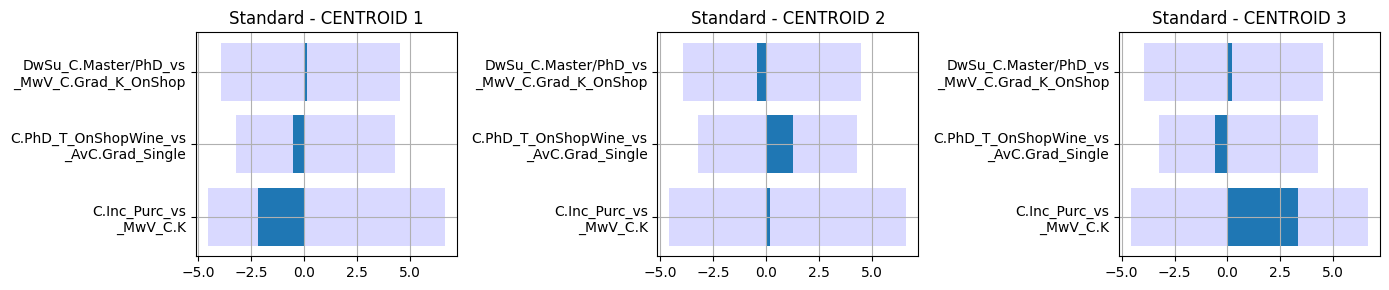

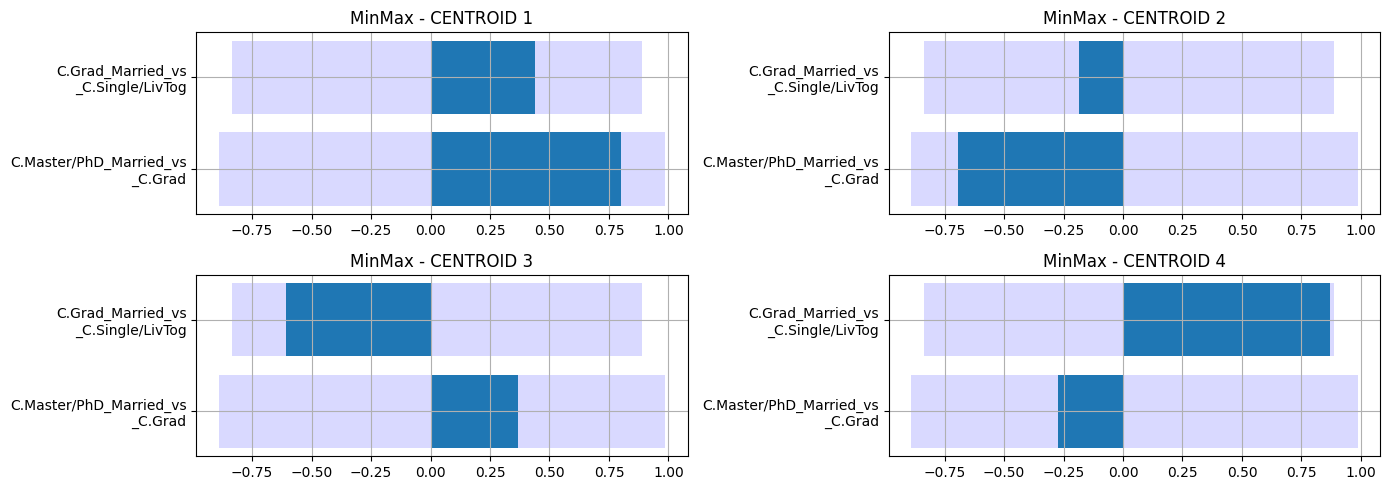

In [ ]:
maxs_std = Y_Xworkdf_std[:, 0:l_std].max(axis=0) 
mins_std = Y_Xworkdf_std[:, 0:l_std].min(axis=0) 

maxs_mm = Y_Xworkdf_mm.max(axis=0) 
mins_mm = Y_Xworkdf_mm.min(axis=0) 

fig_std, ax_std = plt.subplots(1, 3, figsize=(14, 3))
for ii in range(3):
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), maxs_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), mins_std, color='blue', alpha=0.15)
    ax_std[ii].barh(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])
    display(km_std.cluster_centers_[ii, :])
    ax_std[ii].set_yticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_std[ii].set_yticklabels(labels=[stdPC1, stdPC2, stdPC3], rotation=0)  # Note the rotation value
    ax_std[ii].grid(visible=True, which='both')
    ax_std[ii].set_title(f'Standard - CENTROID {ii+1}')
fig_std.tight_layout()

fig_mm, ax_mm = plt.subplots(2, 2, figsize=(14, 5))
num = 0
for ii in range(2):
    for jj in range(2):
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), maxs_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), mins_mm, color='blue', alpha=0.15)
        ax_mm[ii,jj].barh(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[num, :])
        ax_mm[ii,jj].set_yticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
        ax_mm[ii,jj].set_yticklabels(labels=[mmPC1, mmPC2], rotation=0)
        ax_mm[ii,jj].grid(visible=True, which='both')
        ax_mm[ii,jj].set_title(f'MinMax - CENTROID {num+1}')
        num += 1
fig_mm.tight_layout()




## 6. Clusters and Centroid Interpretation and Visualization

STD:
1. Cluster 1: "Customers with many Kids,that check the WebSite regularly"
2. Cluster 2: "Customers with many Children that Mainly have a PHD and Shop on the WebSite"
3. Cluster 3: "Rich Customers that shop a lot"

MM
1. Cluster 1: "Customers with different Education Backgrounds that are Married"
2. Cluster 2: "Customers with Graduation that are Not Married"
3. Cluster 3: "Customers with higher levels of Education that have Eterogenous Marital Status"
4. Cluster 4: "Customers with Graduation that are Married"

In [ ]:
cluster_names_std = ['Customers with many Kids,that check the WebSite regularly',
                     'Customers with many Children that Mainly have a PHD and Shop on the WebSite',
                     'Rich Customers that shop a lot'

]

In [ ]:
cluster_names_mm = ["Customers with different Education Backgrounds that are Married",
                    "Customers with Graduation that are Not Married",
                    "Customers with higher levels of Education that have Eterogenous Marital Status",
                    "Customers with Graduation that are Married",
]

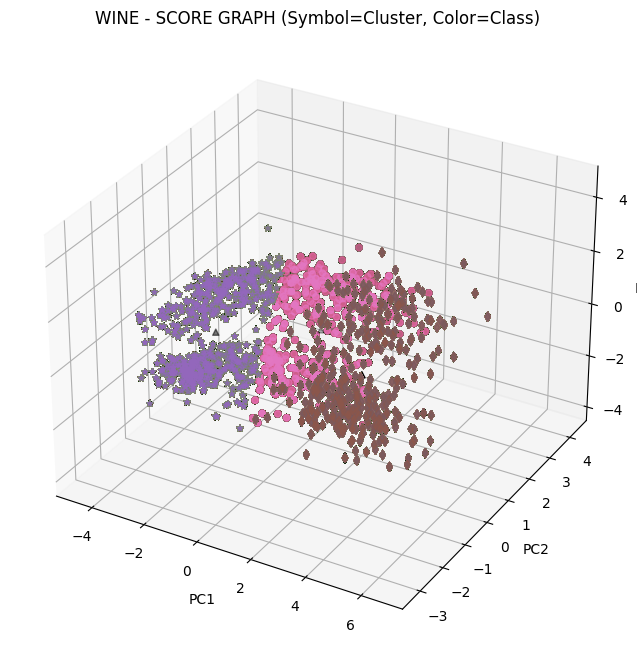

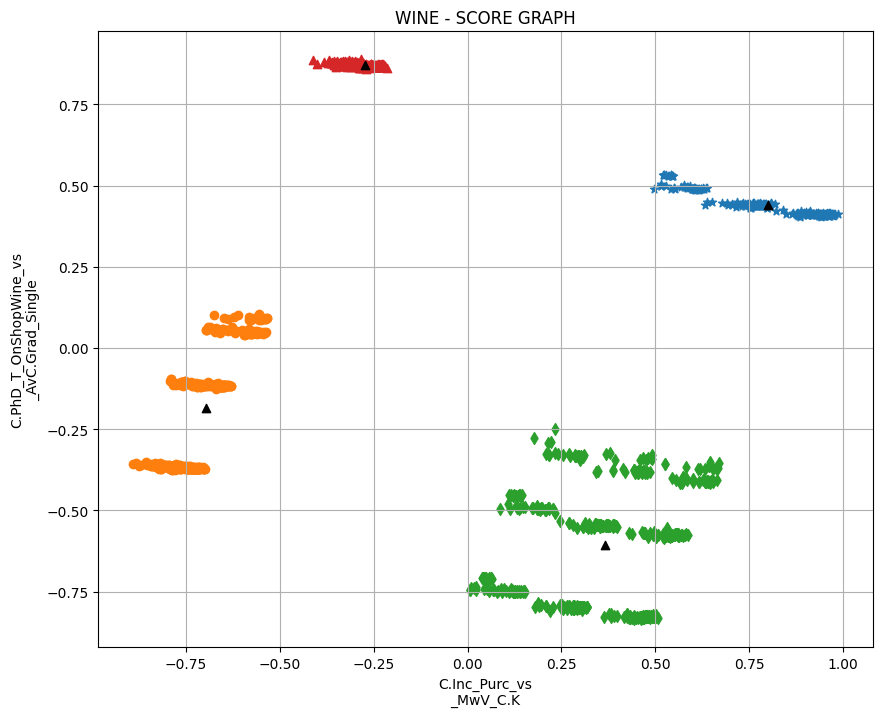

In [ ]:
# markers_dict_std = {0: '*', 1: 'o', 2: 'd'}
markers_dict_std = {
    0: '*', 
    1: 'o', 
    2: 'd',

}
markers_dict_mm = {
    0: '*', 
    1: 'o', 
    2: 'd',
    3: '^',
}



fig_stdscore = plt.figure(figsize=(10, 8))
ax = fig_stdscore.add_subplot(111, projection='3d')
for ll in km_std.labels_:
    ax.scatter(Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 0], Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 1], Y_Xworkdf_std[:, 0:l_std][km_std.labels_ == ll, 2], marker=markers_dict_std[ll])
ax.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black', marker='^')
plt.title('WINE - SCORE GRAPH (Symbol=Cluster, Color=Class)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()




fig_stdscore = plt.figure(figsize=(10, 8))
ax = fig_stdscore.add_subplot(111)
#for ll in km_mm.labels_:
for ll in np.unique(km_mm.labels_):
    ax.scatter(Y_Xworkdf_mm[km_mm.labels_ == ll, 0], Y_Xworkdf_mm[km_mm.labels_ == ll, 1], marker=markers_dict_mm[ll])
ax.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], c='black', marker='^')
plt.title('WINE - SCORE GRAPH')
ax.set_xlabel(f'{stdPC1}')
ax.set_ylabel(f'{stdPC2}')
plt.grid()
plt.show()





- External evaluation

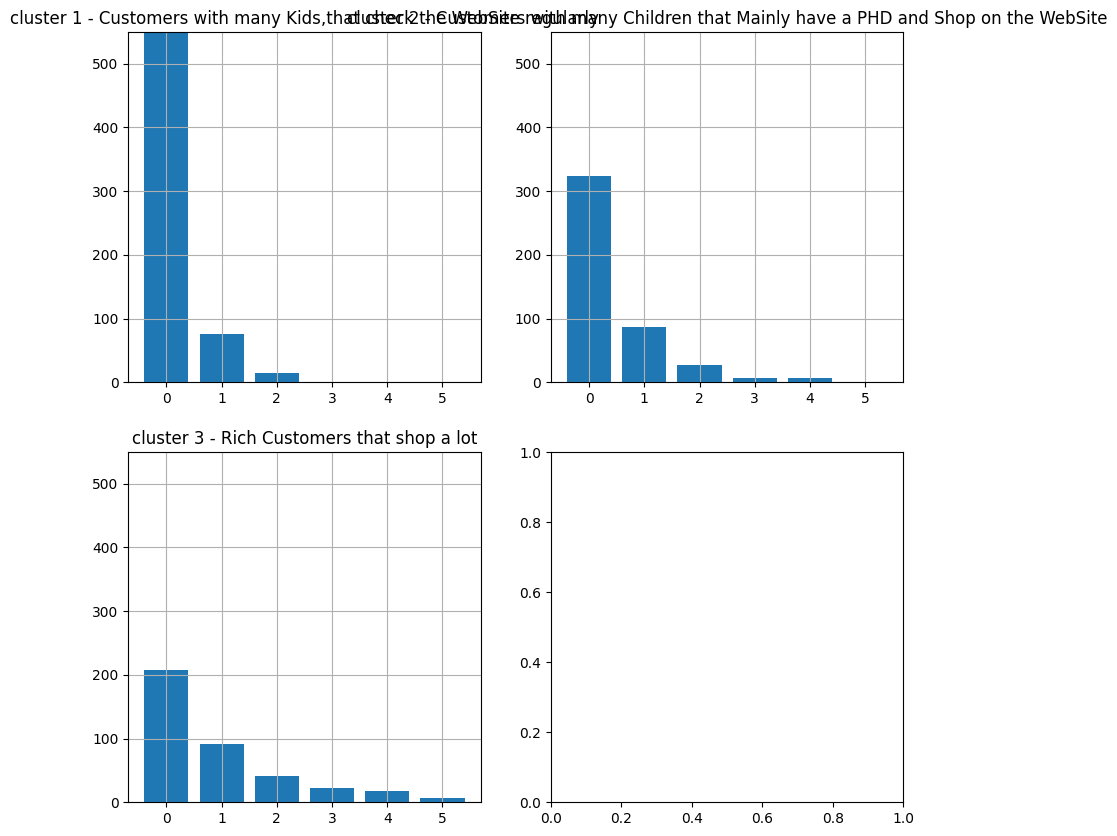

In [ ]:
mask_cluster = [km_std.labels_ == ii for ii in range(best_k_std)]
cluster_complain = [dict(workdf.loc[mask_cluster[ii], 'Cmp'].value_counts()) for ii in range(best_k_std)]

bin_labels = [0, 1, 2, 3, 4, 5]
maxcount = np.max([max(cluster_complain[kk].values()) for kk in range(best_k_std)])

# MAKE the BARPLOT for THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(2, 2, figsize=(10,10))
for ii in range(best_k_std):
    ir = ii//2
    ic =  ii%2
    ax_centroids_ext[ir,ic].bar(bin_labels, [cluster_complain[ii].get(bb,0) for bb in bin_labels])
    ax_centroids_ext[ir,ic].set_ylim(0, maxcount)
    ax_centroids_ext[ir,ic].grid(visible=True, which='both')
    plt.tight_layout
    ax_centroids_ext[ir,ic].set_title(f'cluster {ii + 1} - {cluster_names_std[ii]}')

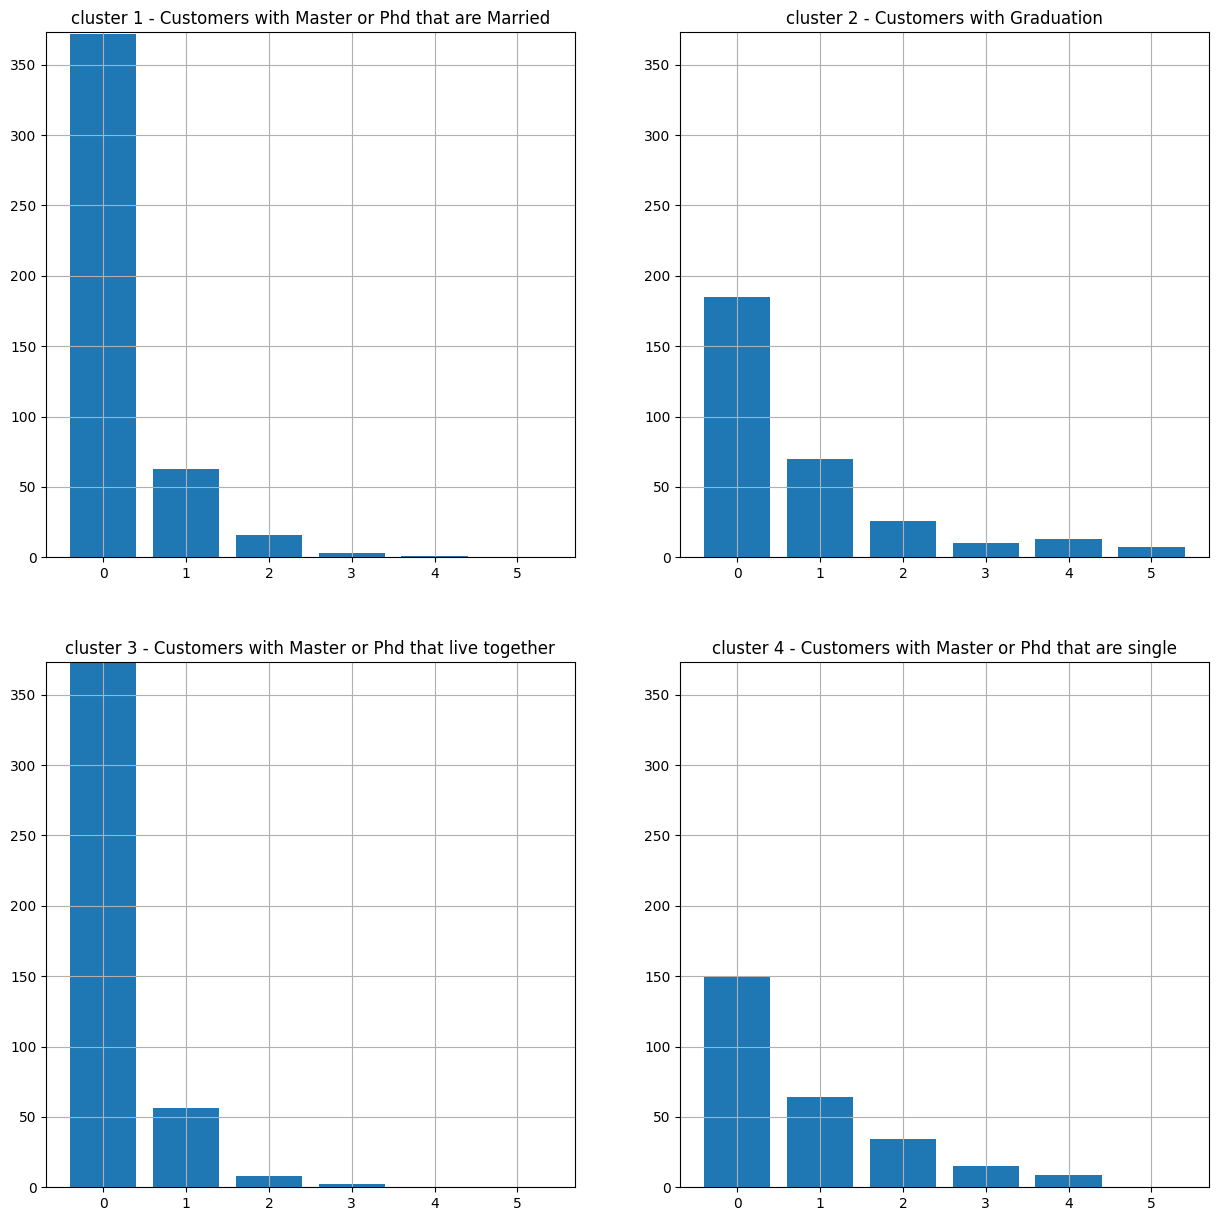

In [ ]:
mask_cluster = [km_mm.labels_ == ii for ii in range(best_k_mm)]
cluster_complain = [dict(workdf.loc[mask_cluster[ii], 'Cmp'].value_counts()) for ii in range(best_k_mm)]

bin_labels = [0, 1, 2, 3, 4, 5]
maxcount = np.max([max(cluster_complain[kk].values()) for kk in range(best_k_mm)])

# MAKE the BARPLOT for THE CENTROIDS
fig_centroids_ext, ax_centroids_ext = plt.subplots(2, 2, figsize=(15,15))
for ii in range(best_k_mm):
    ir = ii//2
    ic =  ii%2
    ax_centroids_ext[ir,ic].bar(bin_labels, [cluster_complain[ii].get(bb,0) for bb in bin_labels])
    ax_centroids_ext[ir,ic].set_ylim(0, maxcount)
    ax_centroids_ext[ir,ic].grid(visible=True, which='both')
    plt.tight_layout
    ax_centroids_ext[ir,ic].set_title(f'cluster {ii + 1} - {cluster_names_mm[ii]}')

- Internal Evaluation

In [ ]:
silscores_std = silhouette_samples(Y_Xworkdf_std[:,0:l_std], km_std.labels_)
cluster_silscores_std = [np.mean(np.array(silscores_std)[km_std.labels_ == kk]) for kk in range(best_k_std)]

display(pd.DataFrame(np.array(cluster_silscores_std + [np.max(silcoeff_list_std)]), index=cluster_names_std + ['Global'], columns=['Sil. Score']))

,Sil. Score
"Customers with many Kids, that Mainly uses the website",0.390883
Rich Customers,0.369066
"Customers registered in the last period of a year, with teens and a Phd, that buy wine online",0.263074
Global,0.347398


In [ ]:
silscores_mm = silhouette_samples(Y_Xworkdf_mm[:,0:l_mm], km_mm.labels_)
cluster_silscores = [np.mean(np.array(silscores_mm)[km_mm.labels_ == kk]) for kk in range(best_k_mm)]

display(pd.DataFrame(np.array(cluster_silscores_mm + [np.max(silcoeff_list_mm)]), index=cluster_names_mm + ['Global'], columns=['Sil. Score']))

NameError: name 'Y_Xworkdf_mm' is not defined